<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 5 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

# Problem Description
The aim of this assignment is to analyze the likelihood of scoring a goal through a football shot using feature engineering techniques. It involves preprocessing a football-related dataset to identify factors influencing goal-scoring. Additionally, the assignment delves into regression and cross-validation concepts, implementing multivariate regression and k-fold cross-validation from scratch, and applying them to car-related datasets for comparison with built-in libraries.

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

## Preprocessing

In [167]:
original_football_df = pd.read_csv("football.csv")
football_df = original_football_df.copy(deep=True)

In [168]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


In [169]:
football_df.describe()

,x,y,interveningOpponents,interveningTeammates,minute,second
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,14.564631,0.364408,2.531989,0.336471,48.541401,29.243810
std,7.841865,8.999063,1.386693,0.680175,26.397998,17.306565
min,0.000000,-33.920000,0.000000,0.000000,0.000000,0.000000
25%,8.480000,-5.740000,2.000000,0.000000,26.000000,14.000000
50%,12.470000,0.500000,2.000000,0.000000,49.000000,29.000000
75%,20.950000,6.730000,3.000000,0.000000,71.000000,44.000000
max,70.820000,33.920000,11.000000,7.000000,98.000000,59.000000


In [170]:
football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [171]:
football_df.tail(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
8920,m_57,p_115,open play,head,6.48,3.99,3,0,high,69,50,missed chance
8921,m_59,p_76,open play,right foot,21.45,-8.73,4,1,medium,15,53,blocked shot
8922,m_55,p_150,open play,left foot,11.97,3.24,3,0,medium,84,34,missed chance
8923,m_33,p_130,open play,right foot,6.48,-6.98,1,0,high,4,39,missed chance
8924,m_142,p_37,open play,right foot,8.23,26.43,2,0,medium,72,17,saved by keeper


In [172]:
football_df.dtypes

matchId                   object
playerId                  object
playType                  object
bodyPart                  object
x                        float64
y                        float64
interveningOpponents       int64
interveningTeammates       int64
interferenceOnShooter     object
minute                     int64
second                     int64
outcome                   object
dtype: object

### divide outcome value into goal or missed

In [173]:
outcome_mapping = {
    "blocked shot": "missed",
    "goal": "goal",
    "hit the post": "missed",
    "missed chance": "missed",
    "saved by keeper": "missed",
}

football_df["outcome"] = football_df["outcome"].map(outcome_mapping)
football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,missed
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,missed
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [174]:
def calculate_angle(x, y):
    theta = 7.32 * x / (x ** 2 + y ** 2 - (7.32/2) **2) 
    if np.arctan(theta) >= 0:
        angle = np.rad2deg(np.arctan(theta))
    else:
        angle = np.rad2deg(np.arctan(theta + np.pi))
    return angle

In [175]:
football_df["distance"] = np.sqrt(football_df["x"] ** 2 + football_df["y"] ** 2)

football_df['angle'] = football_df.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

### Add shot position feature to dataframe

![Alt text](shot_geometric.png)

In this section i define a feature using angle and x,y coordinates of shooter named shot position.If player is in 1st circle the probability of goal is 30%.If he is in 2nd circle the probability of goal is 15% and in 3rd circle the probability of goal is 7%.others just less than 6% chance of goal.     
Source : https://soccermatics.readthedocs.io/en/latest/lesson2/GeometryOfShooting.html#reaction-time

In [176]:
def calculate_shot_position(row):
    x = row["x"]
    y = row["y"]
    angle = row["angle"]

    if (x < 5.5) and (-3.6 < y < 3.6):
        return "30% circle"
    elif (x < 12.5) and (-6.4 < y < 6.4) and (34 < angle <= 180):
        return "15% circle"
    elif (x < 20.15) and (-14.6 < y < 14.6) and (angle > 18):
        return "7% circle"
    else:
        return "out of circles"


football_df["shotPosition"] = football_df.apply(calculate_shot_position, axis=1)

In [177]:
def print_unique_elements(df, columns):
    for column in columns:
        try:
            print(f"\033[94m{column}\033[0m:")
            unique_counts = df[column].value_counts()
            i = 0
            for value, count in unique_counts.items():
                i = i + 1
                print(f"        \033[91m{value}\033[0m {count}")
        except KeyError:
            print(f"    Column '{column}' not found in the DataFrame.")

In [178]:
print_unique_elements(
    football_df, ["playType", "bodyPart", "interveningOpponents", "interveningTeammates" ,"interferenceOnShooter", "outcome" , "shotPosition"]
)

playType:
        open play 8378
        free kick 417
        penalty 126
        olimpico 4
bodyPart:
        right foot 4454
        left foot 2897
        head 1515
        other 59
interveningOpponents:
        2 3150
        3 2135
        1 1885
        4 879
        5 399
        6 217
        7 119
        0 97
        8 38
        9 3
        10 2
        11 1
interveningTeammates:
        0 6746
        1 1554
        2 462
        3 133
        4 26
        5 3
        7 1
interferenceOnShooter:
        medium 4186
        low 3315
        high 1390
outcome:
        missed 7810
        goal 1081
shotPosition:
        out of circles 4141
        7% circle 2674
        15% circle 1744
        30% circle 366


In [179]:
def print_missing_percentages(df):
    total_rows = len(df)

    missing_values = {}

    for col in df.columns:
        missing_count = df[col].isnull().sum()

        missing_percentage = (missing_count / total_rows) * 100

        missing_values[col] = {"count": missing_count, "percentage": missing_percentage}

    for col, values in missing_values.items():
        print(f"{col}: {values['count']} missing values ({values['percentage']}%)")

In [180]:
print_missing_percentages(football_df)

matchId: 0 missing values (0.0%)
playerId: 0 missing values (0.0%)
playType: 0 missing values (0.0%)
bodyPart: 0 missing values (0.0%)
x: 0 missing values (0.0%)
y: 0 missing values (0.0%)
interveningOpponents: 0 missing values (0.0%)
interveningTeammates: 0 missing values (0.0%)
interferenceOnShooter: 34 missing values (0.38095238095238093%)
minute: 0 missing values (0.0%)
second: 0 missing values (0.0%)
outcome: 34 missing values (0.38095238095238093%)
distance: 0 missing values (0.0%)
angle: 0 missing values (0.0%)
shotPosition: 0 missing values (0.0%)


We can understand that each record that is missing interferenceOnShooter field, is also missing outcome field and vice versa.
so if we delete missing value rows from dataFrame we doesn't lose so much information about data.because they only consist 0.36 % of entire dataset.

In [181]:
football_df.dropna(inplace=True)

In [182]:
print_missing_percentages(football_df)

matchId: 0 missing values (0.0%)
playerId: 0 missing values (0.0%)
playType: 0 missing values (0.0%)
bodyPart: 0 missing values (0.0%)
x: 0 missing values (0.0%)
y: 0 missing values (0.0%)
interveningOpponents: 0 missing values (0.0%)
interveningTeammates: 0 missing values (0.0%)
interferenceOnShooter: 0 missing values (0.0%)
minute: 0 missing values (0.0%)
second: 0 missing values (0.0%)
outcome: 0 missing values (0.0%)
distance: 0 missing values (0.0%)
angle: 0 missing values (0.0%)
shotPosition: 0 missing values (0.0%)


In [183]:
print(len(original_football_df))
print(len(football_df))

8925
8891


In [184]:
football_df = football_df.drop_duplicates()
print(len(football_df))

8891


In [185]:
football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,distance,angle,shotPosition
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,17.530810,18.544088,7% circle
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,missed,17.090313,13.982592,out of circles
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,missed,29.456534,14.153255,out of circles
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed,26.948560,15.458384,out of circles
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,11.932141,31.315918,7% circle


### Label Encoding

In [186]:
le = LabelEncoder()

football_df['playType'] = le.fit_transform(football_df['playType'])
football_df['bodyPart'] = le.fit_transform(football_df['bodyPart'])
football_df['interferenceOnShooter'] = le.fit_transform(football_df['interferenceOnShooter'])
football_df['outcome'] = le.fit_transform(football_df['outcome'])
football_df["shotPosition"] = le.fit_transform(football_df["shotPosition"])


football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,distance,angle,shotPosition
0,m_91,p_103,2,3,13.47,-11.22,1,0,2,70,9,0,17.530810,18.544088,2
1,m_17,p_16,2,1,9.48,14.22,3,0,2,55,4,1,17.090313,13.982592,3
2,m_111,p_88,0,1,29.43,-1.25,6,2,1,86,31,1,29.456534,14.153255,3
3,m_142,p_87,2,3,26.93,1.00,4,1,2,77,2,1,26.948560,15.458384,3
4,m_117,p_9,2,3,10.72,5.24,2,0,2,76,46,0,11.932141,31.315918,2


- **playType:**      
0.    free kick     
1.    olimpico     
2.    open play       
3.    penalty                    
- **bodyPart:**             
0.    head      
1.    left foot           
2.    other               
3.    right foot               
- **interferenceOnShooter:**           
0.    high             
1.    low                  
2.    medium                  
- **outcome:**    
0.    goal   
1.    missed     
- **shotPosition:** 
0. 15% circle 
1. 30% circle 
2. 7% circle
3. out of circle 

To determine how important each feature is in your dataset, you can use various methods such as:     

1. **Correlation:** 
    >   Calculate the correlation between each feature and the target variable. Higher absolute correlation values indicate more importance.
    >   Correlation can only capture linear relationships between numerical features and the target variable. It may not capture non-linear relationships or relationships with categorical variables.
    > For categorical target variables, calculating correlation may not be as straightforward and informative as for continuous target variables.
2. **Feature Importance from Models:** 
    >   Train a machine learning model and analyze the feature importance provided by the model.
    >   Using machine learning models to determine feature importance is often effective, as they can capture complex relationships between features and the target variable.
    > Tree-based models (e.g., Random Forest, Gradient Boosting) provide feature importance scores directly.
    > For multi-class classification problems, you can use models like Random Forest or Gradient Boosting and analyze the feature importance for each class separately.
3. **Mutual Information:** 
    >   Calculate mutual information between each feature and the target variable.
    >   Mutual information can capture both linear and non-linear relationships between features and the target variable.
    >   It is particularly useful for categorical target variables as it doesn't make assumptions about the distribution of the data.
    >   Mutual information is calculated directly from the data and doesn't require training a model, making it computationally efficient.
    >   It's well-suited for multi-class classification problems like our problem.

### Mutual Information

Mutual information is a measure of the amount of information obtained about one random variable through the observation of another random variable. In the context of feature selection, mutual information is used to measure the amount of information that a feature contains about the target variable.

In simpler terms, mutual information quantifies the level of dependency between two variables. If two variables have high mutual information, it means that knowing one variable helps us predict the other variable with high accuracy.

In feature selection, mutual information is often used to assess the relevance of each feature with respect to the target variable. Features with higher mutual information values are considered more important for predicting the target variable.

In [187]:
def calculate_mutual_information(df):
    X = df.drop(
        ["matchId", "playerId", "outcome"], axis=1
    )
    y = df["outcome"]

    mi = mutual_info_classif(X, y, random_state=42)
    mi_df = pd.DataFrame({"Feature": X.columns, "Importance": mi})
    mi_df.sort_values(by="Importance", ascending=False, inplace=True)

    return mi_df


mi_df = calculate_mutual_information(football_df)
print(mi_df)

                  Feature  Importance
10                  angle    0.055350
9                distance    0.053569
11           shotPosition    0.044414
4    interveningOpponents    0.042083
2                       x    0.039964
3                       y    0.027339
0                playType    0.018562
5    interveningTeammates    0.008305
1                bodyPart    0.003015
7                  minute    0.002892
6   interferenceOnShooter    0.001414
8                  second    0.000000


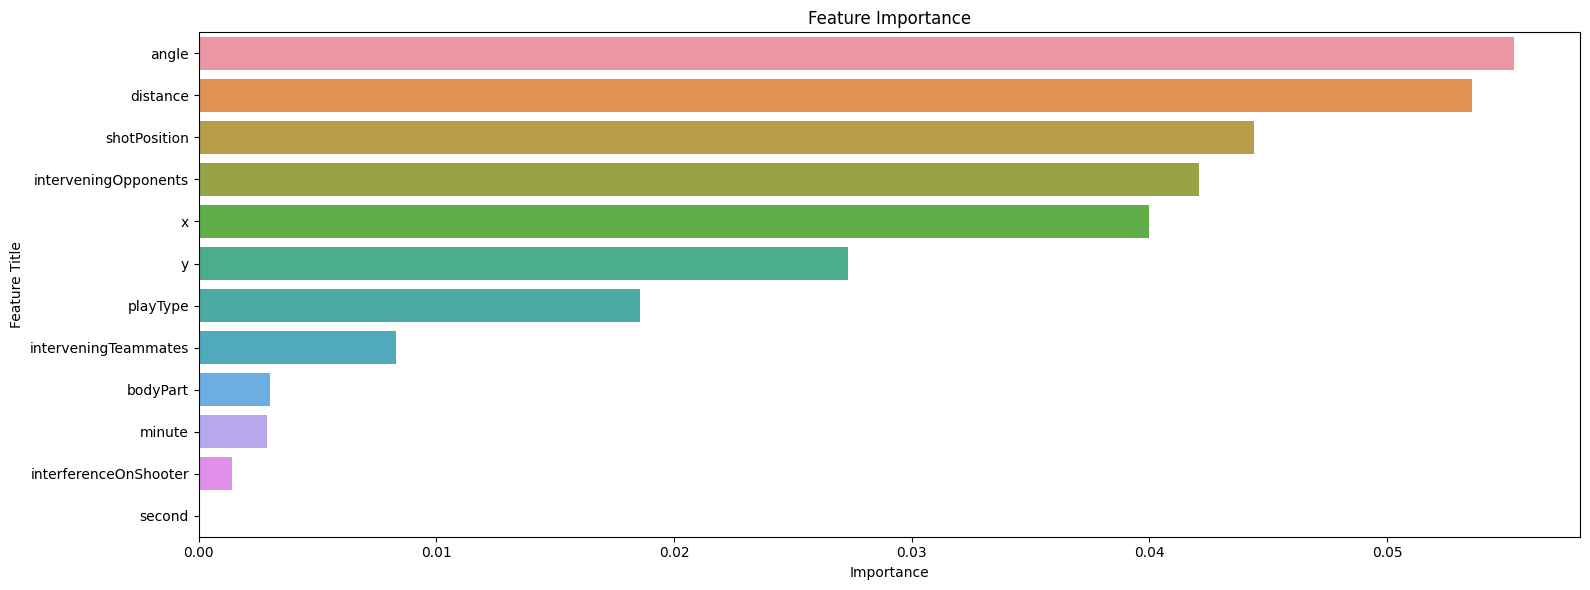

In [188]:
plt.figure(figsize=(16, 6))

sns.barplot(
    y="Feature",
    x="Importance",
    data=mi_df,
    order=mi_df["Feature"],
)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature Title")

plt.tight_layout()
plt.show()

In [189]:
football_final_df = football_df.drop(columns=["bodyPart", "second", "minute"], inplace=False)

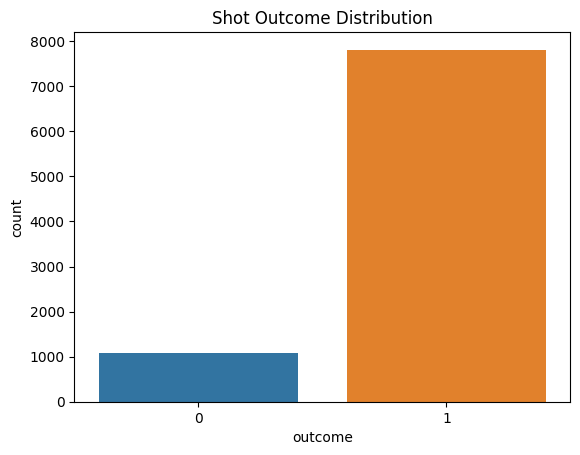

In [190]:
sns.countplot(x="outcome", data=football_df)
plt.title("Shot Outcome Distribution")
plt.show()

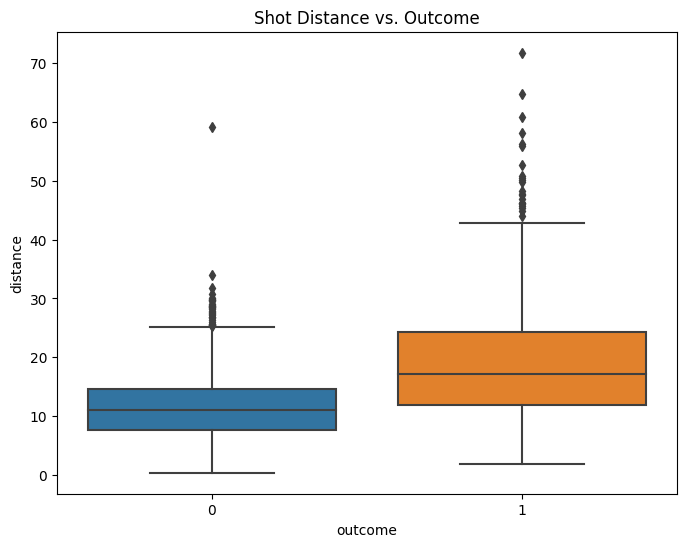

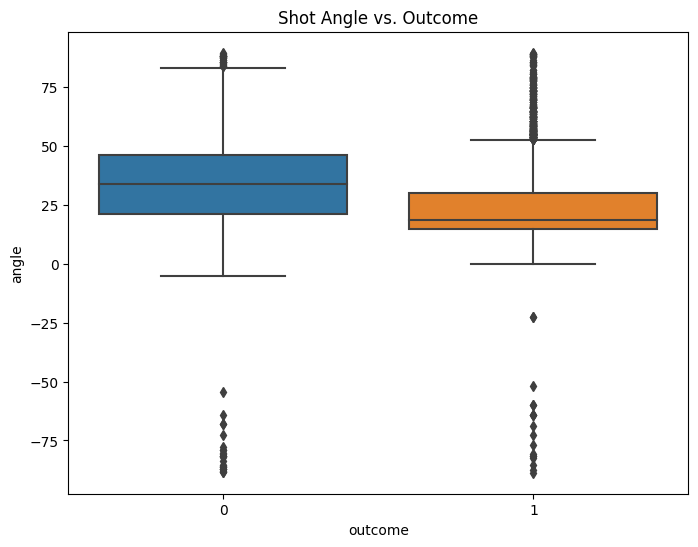

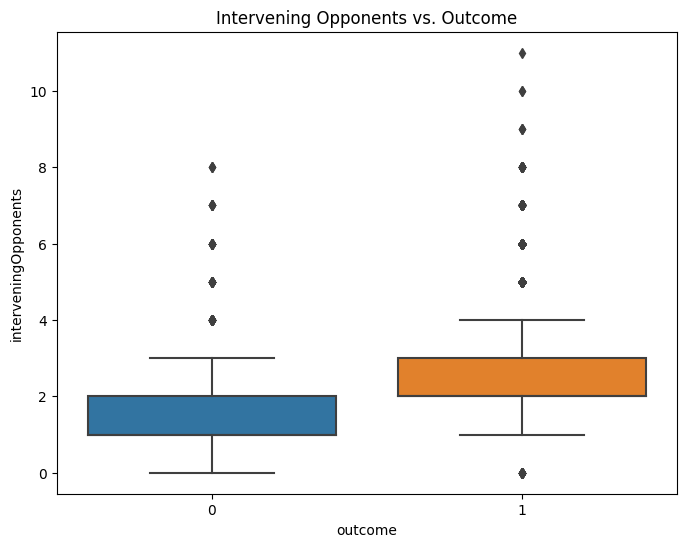

In [191]:
def plot_boxplot(df, x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_col, y=y_col, data=df)
    plt.title(title)
    plt.show()


plot_boxplot(football_df, "outcome", "distance", "Shot Distance vs. Outcome")
plot_boxplot(football_df, "outcome", "angle", "Shot Angle vs. Outcome")
plot_boxplot(football_df, "outcome", "interveningOpponents", "Intervening Opponents vs. Outcome")

plt.show()